In [1]:
import pandas as pd
import numpy as np
import stackview
import functools
import pandas as pd
from skimage.measure import regionprops_table
from skimage.io import imread
from skimage.filters import threshold_otsu
from skimage.measure import label
import matplotlib.pyplot as plt

In [2]:
import bia_bob

In [3]:
image = imread('data/blobs.tif')

# segment image
thresh = threshold_otsu(image)
binary_image = image > thresh
labeled_image = label(binary_image)

In [20]:
properties = regionprops_table(labeled_image, properties=['centroid', 'area', 'feret_diameter_max'])

df = pd.DataFrame(properties)

num_objects = df.shape[0]
pre_selection = np.zeros(num_objects)
pre_selection[:int(num_objects/2)] = 1
df["selection"] = pre_selection

df.head(6)

,centroid-0,centroid-1,area,feret_diameter_max,selection
0,13.212471,19.986143,433.0,36.055513,1.0
1,4.270270,62.945946,185.0,21.377558,1.0
2,12.568389,108.329787,658.0,32.449961,1.0
3,9.806452,154.520737,434.0,26.925824,1.0
4,13.545073,246.809224,477.0,31.384710,1.0
5,15.757895,197.210526,285.0,21.840330,1.0


In [21]:
selected_image = (labeled_image > 1) * 2
selected_image.shape

(254, 256)

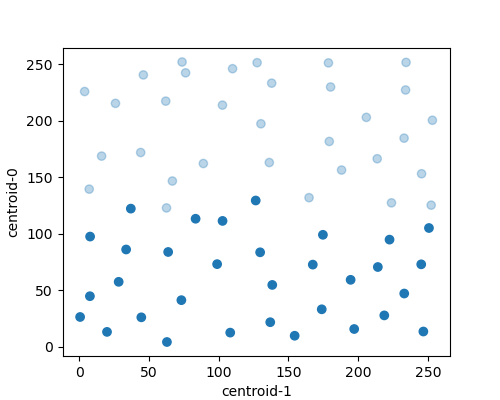

In [22]:
stackview.scatterplot(df, 'centroid-0', 'centroid-1', "selection", figsize=(5,4))

StackViewNDArray([[0, 0, 0, ..., 2, 2, 2],
                  [0, 0, 0, ..., 2, 2, 2],
                  [0, 0, 0, ..., 2, 2, 2],
                  ...,
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0],
                  [0, 0, 0, ..., 0, 0, 0]], dtype=uint32)
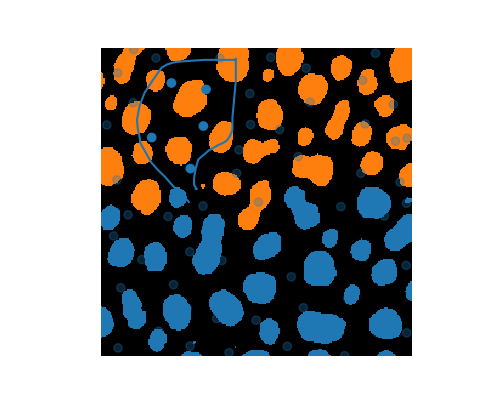

In [23]:
selection = df["selection"].tolist()

selected_image = np.take(np.asarray([-1] + list(selection)) * 1 + 1, labeled_image).astype(np.uint32)

stackview.insight(selected_image)

In [24]:
curtain = stackview.curtain(image, selected_image, alpha=0.7)

In [29]:
def update(selection, label_image, selected_image, widget):
    #print("A")
    temp = np.take(np.asarray([-1] + list(selection)) * 1 + 1, label_image)
    #print(selection)
    
    #stackview.imshow(temp)
    
    np.copyto(selected_image, temp.astype(selected_image.dtype))

    widget.update()

update_selection = functools.partial(update, label_image=labeled_image, selected_image=selected_image, widget=curtain)

In [30]:
update(pre_selection, labeled_image, selected_image, curtain)

In [26]:
scatterplot = stackview.scatterplot(df, 'centroid-0', 'centroid-1', "selection", figsize=(5,4), selection_changed_callback=update_selection)

In [27]:
stackview.grid([[
    curtain,
    scatterplot
]])

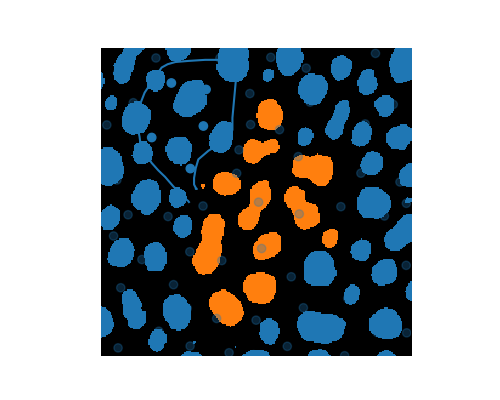

In [19]:
stackview.imshow(selected_image)